#AUTO DETECTION USING YOLO

#Setting Up YOLOv5

###Mounting Google Drive on Colab

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


###Changing current working directory to project's directory

In [2]:
%cd /content/gdrive/MyDrive/VISUAL_RECOGNITION/Assignment3/part_c

/content/gdrive/MyDrive/VISUAL_RECOGNITION/Assignment3/part_c


###Cloning YOLOv5 Github Repo

In [3]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12310, done.
remote: Total 12310 (delta 0), reused 0 (delta 0), pack-reused 12310
Receiving objects: 100% (12310/12310), 11.51 MiB | 6.00 MiB/s, done.
Resolving deltas: 100% (8560/8560), done.


###Installing the requirements to use YOLOv5

In [4]:
!pip install -r yolov5/requirements.txt

#Loading the Dataset (Annotated using LabelMG)

In [5]:
from os import listdir, makedirs
from os.path import isfile, join, exists, isdir
from shutil import rmtree, copy

In [6]:
dataPath = "./final_dataset"
fullDataPath = "./final_dataset/full"
imagesDataPath_full = "./final_dataset/full/images"
annotationsDataPath_full = "./final_dataset/full/annotations"

trainDataPath = "./final_dataset/train"
imagesDataPath_train = "./final_dataset/train/images"
annotationsDataPath_train = "./final_dataset/train/labels"

valDataPath = "./final_dataset/val"
imagesDataPath_val = "./final_dataset/val/images"
annotationsDataPath_val = "./final_dataset/val/labels"

testDataPath = "./final_dataset/test"
imagesDataPath_test = "./final_dataset/test/images"
annotationsDataPath_test = "./final_dataset/test/labels"

In [7]:
images = []
annotations = []

for image in listdir(imagesDataPath_full):
    imgPath = imagesDataPath_full + "/" + image
    images.append(imgPath)

for annotation in listdir(annotationsDataPath_full):
    annotationPath = annotationsDataPath_full + "/" + annotation
    annotations.append(annotationPath)

images.sort()
annotations.sort()

#Splitting Data into Train-Validation-Testing Sets

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, train_size = 0.8, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, train_size = 0.5, random_state = 1)

##Storing the Training Set, Validation Set and Test Set in different directories (to be used by YOLOv5) 

In [10]:
if exists(trainDataPath):
    rmtree(trainDataPath)

if exists(valDataPath):
    rmtree(valDataPath)

if exists(testDataPath):
    rmtree(testDataPath)

makedirs(trainDataPath)
makedirs(imagesDataPath_train)
makedirs(annotationsDataPath_train)

makedirs(valDataPath)
makedirs(imagesDataPath_val)
makedirs(annotationsDataPath_val)

makedirs(testDataPath)
makedirs(imagesDataPath_test)
makedirs(annotationsDataPath_test)

In [11]:
for img in train_images:
    copy(img,imagesDataPath_train)
for img in val_images:
    copy(img,imagesDataPath_val)
for img in test_images:
    copy(img,imagesDataPath_test)

for annot in train_annotations:
    copy(annot,annotationsDataPath_train)
for annot in val_annotations:
    copy(annot,annotationsDataPath_val)
for annot in test_annotations:
    copy(annot,annotationsDataPath_test)

#Training YOLO Model for Custom Dataset

In [12]:
%cd yolov5

/content/gdrive/MyDrive/VISUAL_RECOGNITION/Assignment3/part_c/yolov5


###Parameters used:
1. image size: 500
2. batch size: 64
3. epochs: 200
4. weights: yolov5s
5. Number of workers = 24

In [15]:
!python train.py --img 500 --batch 64 --epochs 200 --data auto_data.yaml --weights yolov5s.pt --workers 24 --name yolo_auto_det

train: weights=yolov5s.pt, cfg=, data=auto_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=64, imgsz=500, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=24, project=runs/train, name=yolo_auto_det, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-74-gcf4f3c3 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate

Mean Accuracy Precision on Validation Set (Last Epoch): 93.7%

#Testing the Model

##Detecting Autos in Test Images

In [18]:
!python detect.py --weights runs/train/yolo_auto_det2/weights/best.pt --img 500 --conf 0.1 --source '../final_dataset/test/images' --name yolo_auto_det_testing

detect: weights=['runs/train/yolo_auto_det2/weights/best.pt'], source=../final_dataset/test/images, data=data/coco128.yaml, imgsz=[500, 500], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolo_auto_det_testing, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-74-gcf4f3c3 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/36 /content/gdrive/MyDrive/VISUAL_RECOGNITION/Assignment3/part_c/final_dataset/test/images/Datacluster-Auto--100-_jpg.rf.eb1344b8b833cf0db25099a3181a24c5.jpg: 512x512 1 Auto, Done. (0.075s)
image 2/36 /content/gdrive/MyDrive/VISUAL_RECOGNITION/Assignment3/part_c/final_dataset/test/images/Datacluster-Auto--101-_jpg.rf.d6a160c7ff

##Visualizing detected Autos in Test Images

In [19]:
import glob
from IPython.display import Image, display

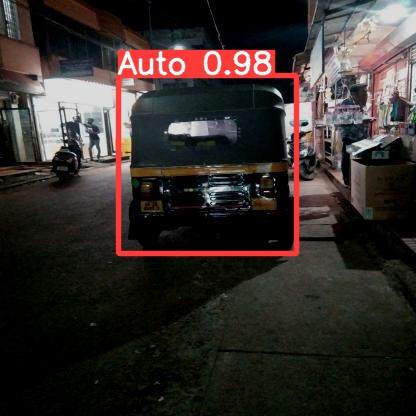

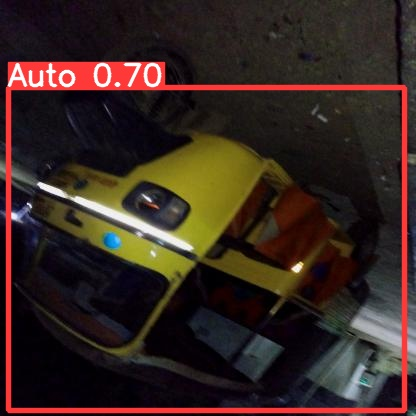

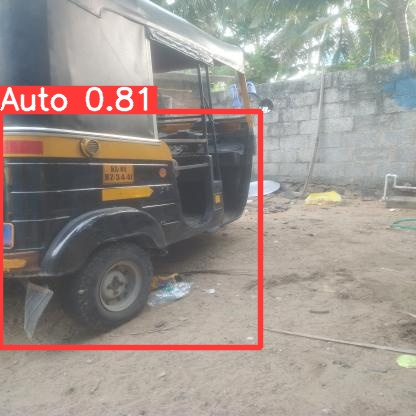

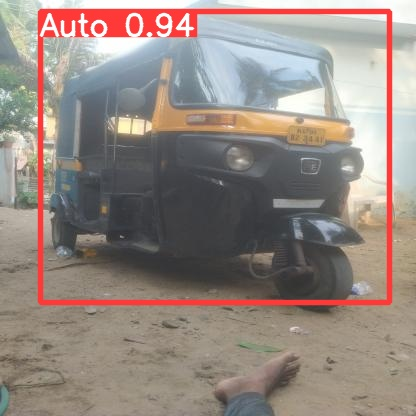

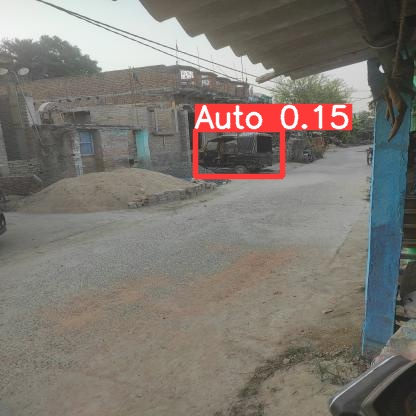

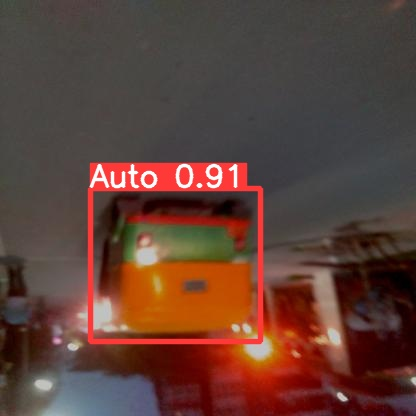

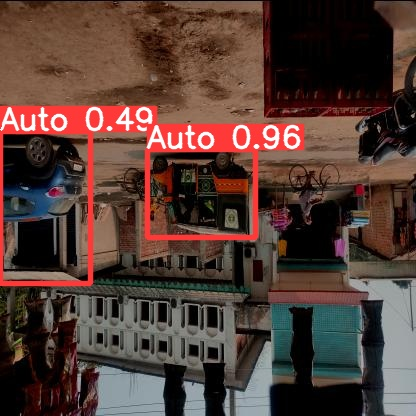

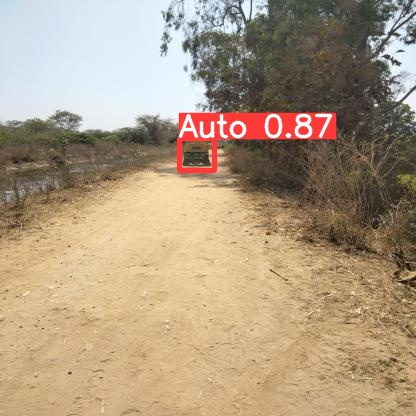

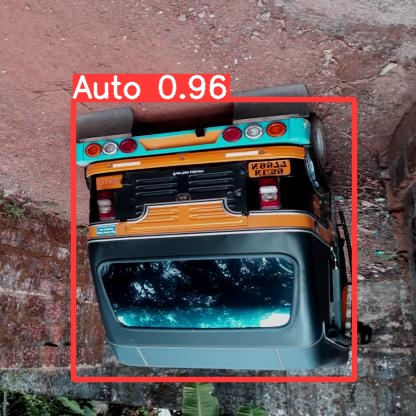

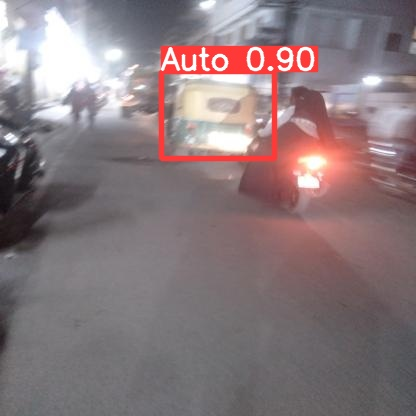

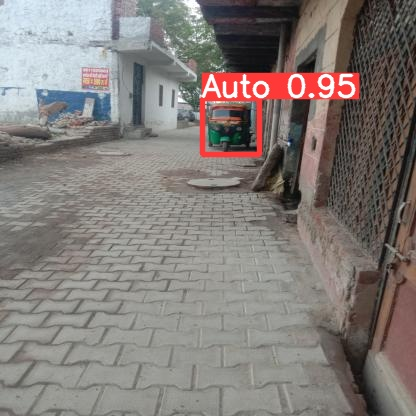

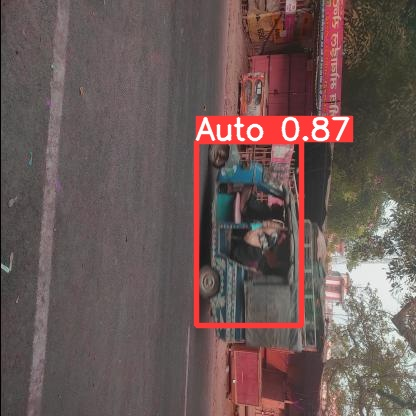

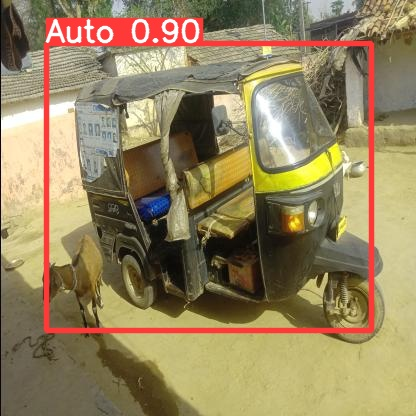

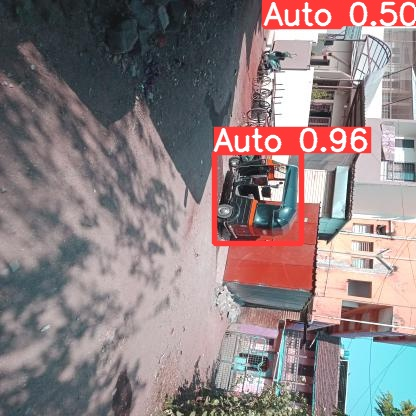

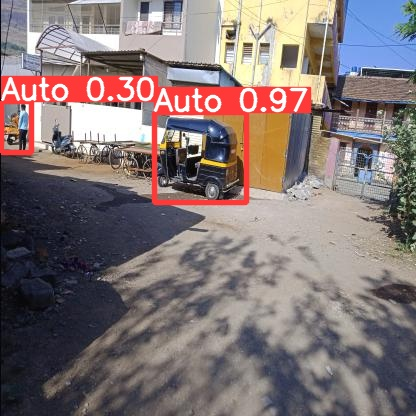

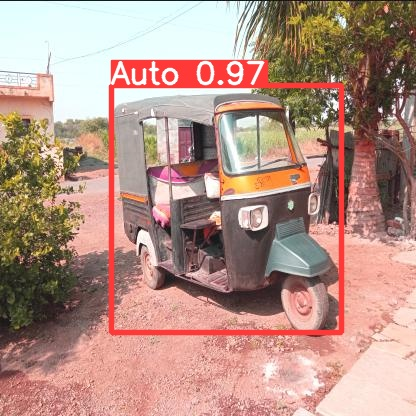

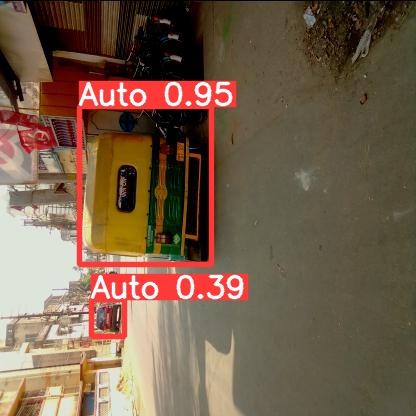

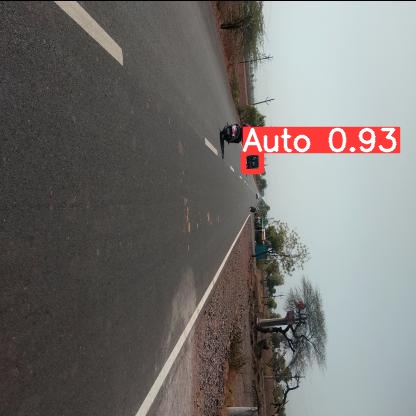

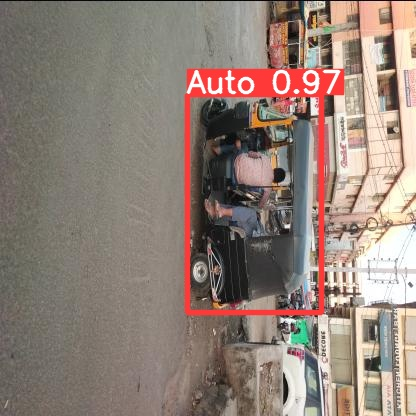

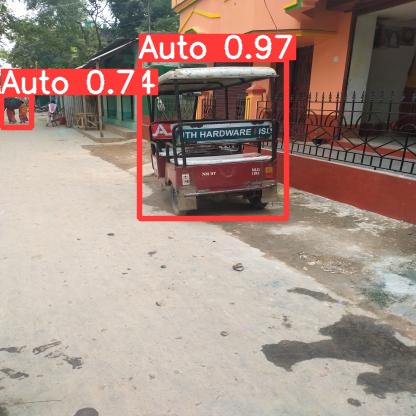

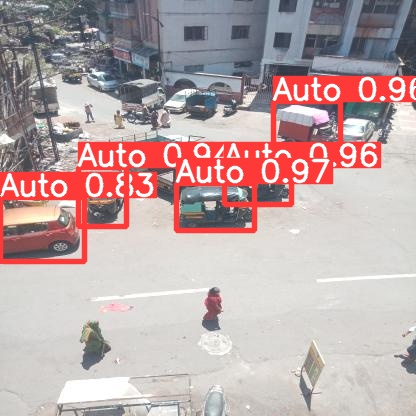

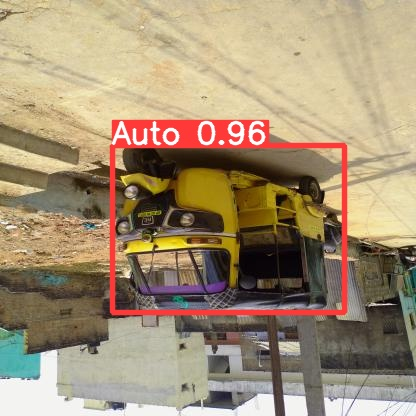

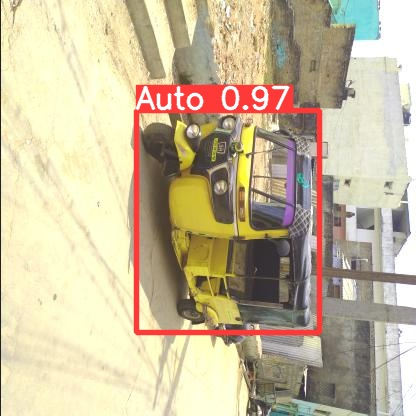

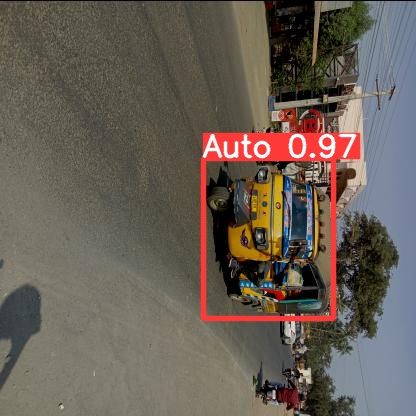

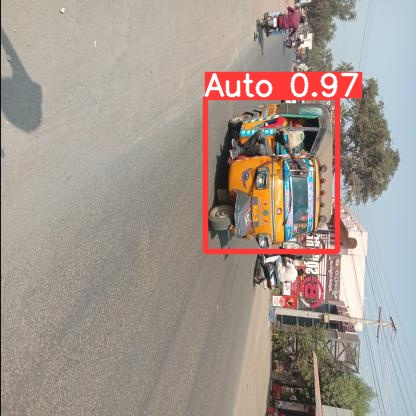

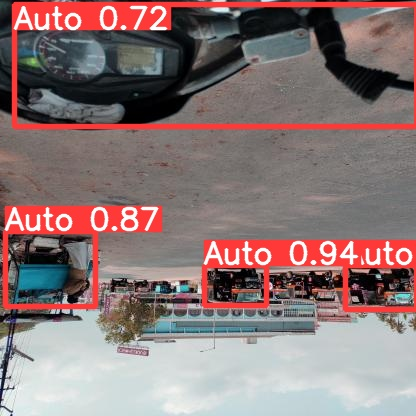

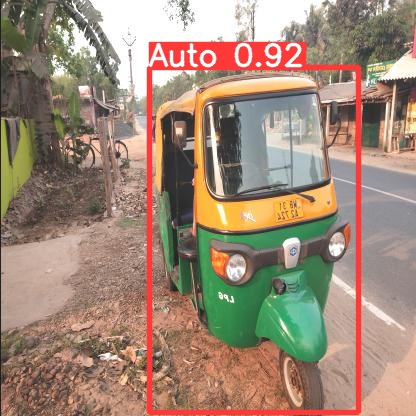

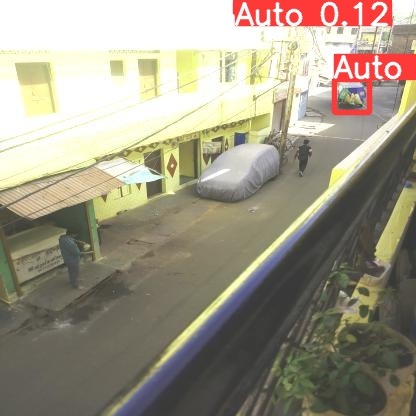

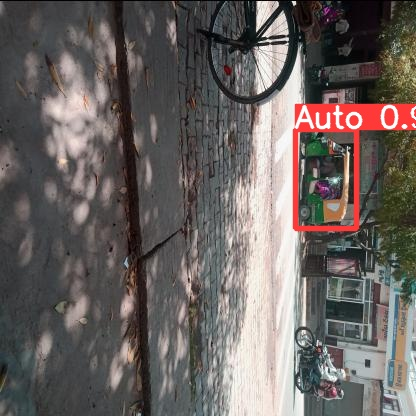

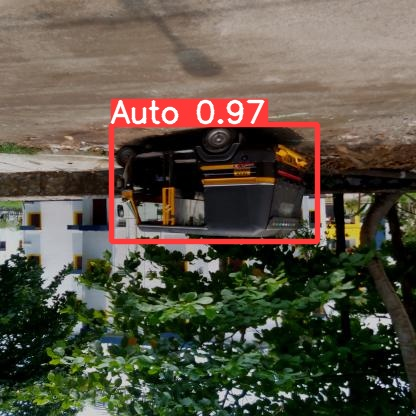

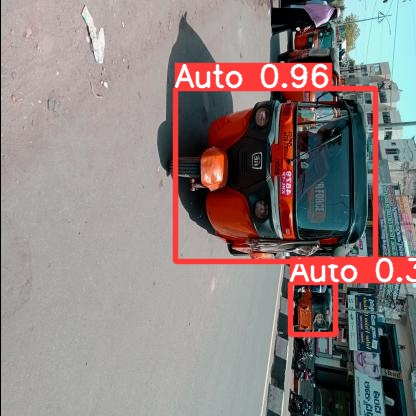

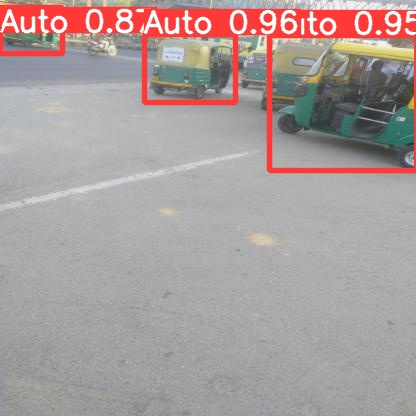

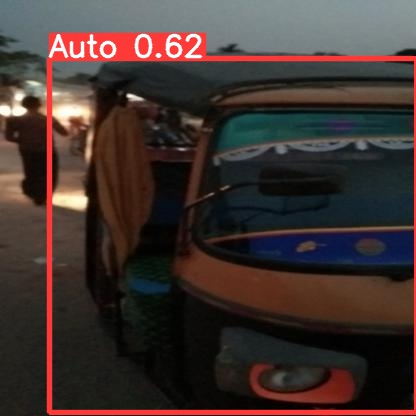

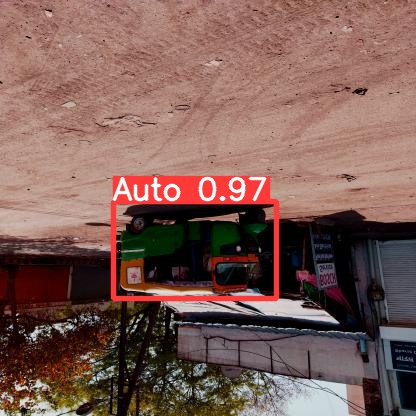

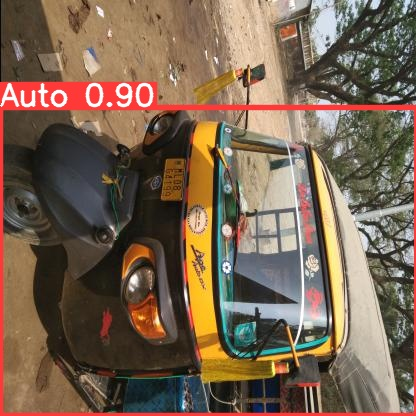

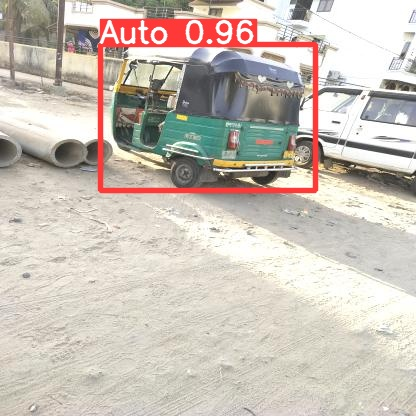

In [20]:
for imageName in glob.glob('./runs/detect/yolo_auto_det_testing3/*.jpg'):
    display(Image(filename=imageName))
    print("\n")

##Computing Mean Average Precision (mAP) on Testing Set

In [22]:
!python val.py --weights runs/train/yolo_auto_det2/weights/best.pt --data auto_data.yaml --task test --name yolo_det_tested

val: data=/content/gdrive/MyDrive/VISUAL_RECOGNITION/Assignment3/part_c/yolov5/data/auto_data.yaml, weights=['runs/train/yolo_auto_det2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=yolo_det_tested, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-74-gcf4f3c3 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning '/content/gdrive/MyDrive/VISUAL_RECOGNITION/Assignment3/part_c/yolov5/../final_dataset/test/labels' images and labels...36 found, 0 missing, 0 empty, 0 corrupt: 100% 36/36 [00:00<00:00, 147.73it/s]
test: New cache created: /content/gdrive/MyDrive/VISUAL_RECOGNITION/Assignment3/part_c/yolov5/../final_dataset/test/labels.cache
               Class     Images     Labels          P

Mean Accuracy Precision on Testing Set (Last Epoch): 90.8%